# LOGISTIC REGRESSION


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Reading and Formatting the Training Dataset

In [40]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop('Name' , axis = 1)
train_df['IsFemale'] = (train_df['Sex'] == 'female').astype(int)
train_df = train_df.drop('Sex' , axis  = 1)
mean = train_df.mean()
std = train_df.std()
train_df = (train_df - mean)/std #  Feature Scaling using Z-Score Normalization
train_df['Survived'] = train_df['Survived']*std.Survived + mean.Survived
train_df

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,IsFemale
0,0.0,0.826213,-0.516323,0.406014,-0.482881,-0.527431,-0.775715
1,1.0,-1.569390,0.609757,0.406014,-0.482881,0.840329,1.286900
2,1.0,0.826213,-0.234803,-0.491573,-0.482881,-0.513013,1.286900
3,1.0,-1.569390,0.398617,0.406014,-0.482881,0.451931,1.286900
4,0.0,0.826213,0.398617,-0.491573,-0.482881,-0.510343,-0.775715
...,...,...,...,...,...,...,...
572,0.0,0.826213,-0.727463,-0.491573,-0.482881,-0.372570,-0.775715
573,1.0,-0.371588,0.328237,-0.491573,-0.482881,-0.404611,1.286900
574,1.0,-1.569390,0.680137,0.406014,-0.482881,0.511740,1.286900
575,0.0,0.826213,-0.797843,0.406014,-0.482881,-0.373461,1.286900


# Creating the Sigmoid Function


In [9]:
def sigmoid(z):
    sigmoid_func = 1/float(1 + np.exp(-z))
    return sigmoid_func

# Implementing Gradient Descent for the Logistic Regression Model

In [8]:
def gradient_descent(w_updated, b_updated , learning_rate, df):
    der_w = np.zeros(len(w_updated)) # Array storing dervative of cost function with respect to w(i) 
    der_b = 0 # Variable storing deravative of cost function with respect to b
    loss_function = 0 # Variable storing the value of Loss Function 

    # gradient descent
    for i in range(len(df)):
        x = df.iloc[i][1:].values
        y = df.iloc[i].Survived
        Z = np.dot(x,w_updated) + b_updated 
        prediction = sigmoid(Z) # Using Sigmoid Function to Predict Survivors
        loss_function += -y*(math.log(prediction)) - (1 - y)*(math.log(1-prediction)) #Calculating the Loss Function
        der_w += ((prediction - y) * x)/float(len(df))
        der_b += (prediction - y)/float(len(df)) 
        
    w = w_updated - learning_rate*der_w  # Updating value of w(i)
    b = b_updated - learning_rate*der_b  # Updating value of b
    loss_function = loss_function/float(len(df))

    return w,b,loss_function
  

# Implementing Logistic Regression Model for the Training Data Set

In [10]:
w = np.zeros(len(train_df.columns) - 1) # Intialising array storing w(i) with initial value as 0
b = 0 # Initialising Variable storing b with intial value as 0
learning_rate = 0.001 # Learning Rate
lost_function = 0 # Loss Function
epochs = 50000
loss_func = [0 for i in range(epochs+1)] #Initialising list to store the value of loss function for multiple epochs to be used for plotting graph

# Using the Logistic Regression for the Training Set

for i in range (epochs+1):
    w,b,loss_function = gradient_descent(w,b,learning_rate,train_df)
    
    if i%5000 == 0:
        print (f"Epoch:{i}")
        print (f" Cost Function:{loss_function}")
        

    loss_func[i] = loss_function #Storing value of loss function for Given Epoch

Epoch:0
 Cost Function:0.6931471805599468
Epoch:5000
 Cost Function:0.49914705641427437
Epoch:10000
 Cost Function:0.47260531514516363
Epoch:15000
 Cost Function:0.4648851034304145
Epoch:20000
 Cost Function:0.4616803488386241
Epoch:25000
 Cost Function:0.4600710053130716
Epoch:30000
 Cost Function:0.4591760103985186
Epoch:35000
 Cost Function:0.45864968946036216
Epoch:40000
 Cost Function:0.4583301361664319
Epoch:45000
 Cost Function:0.4581323764028051
Epoch:50000
 Cost Function:0.45800852300476713


In [43]:
for i in range(len(train_df.columns) - 1):
    print (f"The value of w({i+1}) is : {w[i]}")

print (f"The value of b is : {b}")

The value of w(1) is : -0.8301846618275414
The value of w(2) is : -0.5196686987396489
The value of w(3) is : -0.4482772491154362
The value of w(4) is : -0.012527796397952502
The value of w(5) is : -0.03497675901282136
The value of w(6) is : 1.3086940590735834
The value of b is : -0.5689490214549797


# Plotting the Graph between Loss Function and No. of Epochs



The Loss function is: 0.45800852300476713





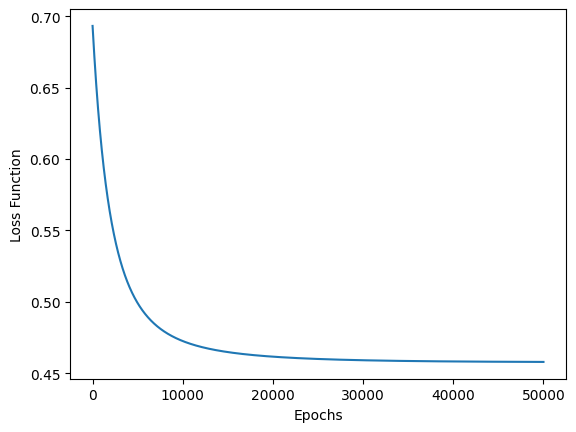

In [46]:
print ("\n")
print (f"The Loss function is: {loss_function}\n")
print ("\n")
plt.plot(range(epochs+1), loss_func)
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.show() # Printing the plot of Loss Function vs Epochs

# Predicting the Survivors in the test dataset using the trained Logistic Regression Model

In [41]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop('Name' , axis = 1)
test_df['IsFemale'] = (test_df['Sex'] == 'female').astype(int)
test_df = test_df.drop('Sex' , axis  = 1)
test_df = (test_df - mean)/std #  Feature Scaling using Z-Score Normalization
test_df['Survived'] = test_df['Survived']*std.Survived + mean.Survived
test_df
Survival_Prediction = [ 0 for i in range(len(test_df))]

for i in range(len(test_df)):
        x = test_df.iloc[i][1:].values
        y = test_df.iloc[i].Survived
        Z = np.dot(x,w) + b
        prediction = sigmoid(Z) # Using Sigmoid Function to Predict Survivors
        if (prediction >= 0.5):
            Survival_Prediction[i] = 1
        else :
            Survival_Prediction[i] = 0

test_df['Predicted Survival'] = Survival_Prediction


# Calculating the Accuracy of Logisitic Regression Model

In [42]:
correct_predictions = 0 # Number of Correct Predictions made by the Logistic Regression Model
total_predictions = len(test_df) # Total Number of Predictions made by the Model

for i in range(len(test_df)):
    y_true = test_df.iloc[i][0]
    y_pred = test_df.iloc[i][-1]
    if y_true == y_pred:
        correct_predictions =correct_predictions+1

accuracy = (correct_predictions/float(total_predictions))*100 # Calculating the Accuracy Score for the Logistic Regression Model

print (f"\nThe accuracy of the Logistic Regression Model is:{accuracy}%\n")

test_df



The accuracy of the Logistic Regression Model is:80.96774193548387%



,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,IsFemale,Predicted Survival
0,1.0,-0.371588,-0.305183,0.406014,0.801093,-0.041488,1.286900,1
1,1.0,-1.569390,0.680137,0.406014,0.801093,1.686191,1.286900,1
2,0.0,-0.371588,1.735836,-0.491573,-0.482881,-0.126929,-0.775715,0
3,0.0,-1.569390,0.468997,-0.491573,-0.482881,0.174783,-0.775715,0
4,0.0,0.826213,-0.938603,-0.491573,-0.482881,-0.496192,-0.775715,0
...,...,...,...,...,...,...,...,...
305,0.0,-0.371588,-0.164423,-0.491573,-0.482881,-0.404611,-0.775715,0
306,1.0,-1.569390,-0.727463,-0.491573,-0.482881,-0.041488,1.286900,1
307,0.0,0.826213,-1.572023,0.406014,2.085066,-0.181397,1.286900,1
308,1.0,-1.569390,-0.234803,-0.491573,-0.482881,-0.041488,-0.775715,1
